In [137]:
import numpy as np
import pandas as pd 
import os
import shutil
import matplotlib.pyplot as plt


In [138]:
#reading the data
df=pd.read_csv("Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv") 

In [139]:
df.columns

Index(['Data as of', 'Start week', 'End Week', 'State', 'Sex', 'Age group',
       'COVID-19 Deaths', 'Total Deaths', 'Pneumonia Deaths',
       'Pneumonia and COVID-19 Deaths', 'Influenza Deaths',
       'Pneumonia, Influenza, or COVID-19 Deaths', 'Footnote'],
      dtype='object')

In [140]:
df.describe()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
count,1117.000000,1231.000000,1099.000000,1080.000000,889.000000,1072.000000
mean,392.071620,5431.272136,568.961783,177.848148,53.065242,851.514925
std,2844.711975,40164.703569,4013.662047,1270.560239,342.571187,5938.021238
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,52.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,327.000000,30.000000,0.000000,0.000000,44.500000
75%,61.000000,1748.000000,166.000000,26.000000,19.000000,231.250000
max,54861.000000,835607.000000,78266.000000,24147.000000,6110.000000,114209.000000


In [141]:
df.head()

,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,5/13/20,2/1/20,5/9/20,United States,All Sexes,Under 1 year,4.0,4258.0,37.0,1.0,11.0,51.0,NaN
1,5/13/20,2/1/20,5/9/20,United States,All Sexes,1-4 years,2.0,832.0,33.0,2.0,35.0,68.0,NaN
2,5/13/20,2/1/20,5/9/20,United States,All Sexes,5-14 years,6.0,1223.0,41.0,0.0,43.0,90.0,NaN
3,5/13/20,2/1/20,5/9/20,United States,All Sexes,15-24 years,59.0,7452.0,157.0,21.0,42.0,234.0,NaN
4,5/13/20,2/1/20,5/9/20,United States,All Sexes,25-34 years,388.0,15975.0,556.0,170.0,135.0,896.0,NaN


In [142]:
#df=pd.read_csv("Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv",index_col='Age group') 

In [143]:
#df.head()

In [144]:

df.rename(columns={'Start week':'Start_week','End Week':'End_Week','Age group':'Age_group','COVID-19 Deaths':'COVID-19_Deaths',
                   'Total Deaths':'Total_Deaths','Pneumonia Deaths':'Pneumonia_Deaths','Pneumonia and COVID-19 Deaths':'Pneumonia_COVID-19_Deaths',
                     'Influenza Deaths':'Influenza_Deaths','Pneumonia, Influenza, or COVID-19 Deaths': 'P_I_C_deaths'}, inplace=True)



In [145]:
df.State.unique()

array(['United States', 'United States Total', 'Alabama', 'Alabama Total',
       'Alaska', 'Alaska Total', 'Arizona', 'Arizona Total', 'Arkansas',
       'Arkansas Total', 'California', 'California Total', 'Colorado',
       'Colorado Total', 'Connecticut', 'Connecticut Total', 'Delaware',
       'Delaware Total', 'District of Columbia',
       'District of Columbia Total', 'Florida', 'Florida Total',
       'Georgia', 'Georgia Total', 'Hawaii', 'Hawaii Total', 'Idaho',
       'Idaho Total', 'Illinois', 'Illinois Total', 'Indiana',
       'Indiana Total', 'Iowa', 'Iowa Total', 'Kansas', 'Kansas Total',
       'Kentucky', 'Kentucky Total', 'Louisiana', 'Louisiana Total',
       'Maine', 'Maine Total', 'Maryland', 'Maryland Total',
       'Massachusetts', 'Massachusetts Total', 'Michigan',
       'Michigan Total', 'Minnesota', 'Minnesota Total', 'Mississippi',
       'Mississippi Total', 'Missouri', 'Missouri Total', 'Montana',
       'Montana Total', 'Nebraska', 'Nebraska Total', 'Neva

In [146]:
#df.rename(index = {'Under 1 year':'0-1', '1-4 years':'1-4', '5-14 years':'5-14', '15-24 years':'15-24',
       #'25-34 years':'25-34', '35-44 years':'35-44', '45-54 years':'45-54', '55-64 years':'55-64',
      #'65-74 years':'65-74', '75-84 years':'75-84', '85 years and over':'<85',}, 
          #                      inplace = True)

In [147]:
df.head()

,Data as of,Start_week,End_Week,State,Sex,Age_group,COVID-19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_COVID-19_Deaths,Influenza_Deaths,P_I_C_deaths,Footnote
0,5/13/20,2/1/20,5/9/20,United States,All Sexes,Under 1 year,4.0,4258.0,37.0,1.0,11.0,51.0,NaN
1,5/13/20,2/1/20,5/9/20,United States,All Sexes,1-4 years,2.0,832.0,33.0,2.0,35.0,68.0,NaN
2,5/13/20,2/1/20,5/9/20,United States,All Sexes,5-14 years,6.0,1223.0,41.0,0.0,43.0,90.0,NaN
3,5/13/20,2/1/20,5/9/20,United States,All Sexes,15-24 years,59.0,7452.0,157.0,21.0,42.0,234.0,NaN
4,5/13/20,2/1/20,5/9/20,United States,All Sexes,25-34 years,388.0,15975.0,556.0,170.0,135.0,896.0,NaN


In [154]:
df["Age_group"]= df["Age_group"].replace({'Under 1 year':'0-1','1-4 years':'1-4','5-14 years':'5-14','15-24 years':'15-24',
       '25-34 years':'25-34', '35-44 years':'35-44', '45-54 years':'45-54', '55-64 years':'55-64',
      '65-74 years':'65-74', '75-84 years':'75-84', '85 years and over':'<85'}) 

In [155]:
df.head()

,Data as of,Start_week,End_Week,State,Sex,Age_group,COVID-19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_COVID-19_Deaths,Influenza_Deaths,P_I_C_deaths,Footnote
0,5/13/20,2/1/20,5/9/20,United States,All Sexes,0-1,4.0,4258.0,37.0,1.0,11.0,51.0,NaN
1,5/13/20,2/1/20,5/9/20,United States,All Sexes,1-4,2.0,832.0,33.0,2.0,35.0,68.0,NaN
2,5/13/20,2/1/20,5/9/20,United States,All Sexes,5-14,6.0,1223.0,41.0,0.0,43.0,90.0,NaN
3,5/13/20,2/1/20,5/9/20,United States,All Sexes,15-24,59.0,7452.0,157.0,21.0,42.0,234.0,NaN
4,5/13/20,2/1/20,5/9/20,United States,All Sexes,25-34,388.0,15975.0,556.0,170.0,135.0,896.0,NaN


In [156]:
states=['Alabama',
       'Alaska', 'Arizona',  'Arkansas',
       'California',  'Colorado',
        'Connecticut',  'Delaware',
       'District of Columbia',
        'Florida', 
       'Georgia', 'Hawaii', 'Idaho',
        'Illinois',  'Indiana',
       'Iowa',  'Kansas', 
       'Kentucky',  'Louisiana', 
       'Maine',  'Maryland', 
       'Massachusetts',  'Michigan',
        'Minnesota', 'Mississippi',
        'Missouri', 'Montana',
        'Nebraska',  'Nevada',
       'New Hampshire', 
       'New Jersey', 'New Mexico', 
       'New York',  'New York City',
        'North Carolina', 
       'North Dakota',  'Ohio', 
       'Oklahoma',  'Oregon', 
       'Pennsylvania', 'Rhode Island',
        'South Carolina', 
       'South Dakota',  'Tennessee',
      'Texas', 'Utah', 
       'Vermont',  'Virginia', 
       'Washington',  'West Virginia',
        'Wisconsin', 'Wyoming',
    'Puerto Rico', ]

In [157]:
#df.loc[0:100:50]

In [158]:
#df[df.Age_group =='35-44 years'& df.State=='Alabama'].plot.scatter['P_I_C_deaths','COVID-19_Deaths']

In [159]:
df.State.value_counts()

United States          37
West Virginia          25
Arizona                25
Mississippi            25
Kansas                 25
                       ..
Montana Total           1
Nevada Total            1
Wisconsin Total         1
Missouri Total          1
New Hampshire Total     1
Name: State, Length: 108, dtype: int64

In [160]:
Arizona=df.query('State=="Arizona"')

In [161]:
Arizona

,Data as of,Start_week,End_Week,State,Sex,Age_group,COVID-19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_COVID-19_Deaths,Influenza_Deaths,P_I_C_deaths,Footnote
90,5/13/20,2/1/20,5/9/20,Arizona,Male,0-1,0.0,51.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1–9...
91,5/13/20,2/1/20,5/9/20,Arizona,Male,1-4,0.0,14.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1–9...
92,5/13/20,2/1/20,5/9/20,Arizona,Male,5-14,0.0,20.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1–9...
93,5/13/20,2/1/20,5/9/20,Arizona,Male,15-24,0.0,207.0,0.0,0.0,0.0,0.0,NaN
94,5/13/20,2/1/20,5/9/20,Arizona,Male,25-34,NaN,309.0,NaN,NaN,NaN,NaN,One or more data cells have counts between 1–9...
95,5/13/20,2/1/20,5/9/20,Arizona,Male,35-44,NaN,349.0,12.0,NaN,NaN,16.0,One or more data cells have counts between 1–9...
96,5/13/20,2/1/20,5/9/20,Arizona,Male,45-54,12.0,612.0,31.0,NaN,NaN,39.0,One or more data cells have counts between 1–9...
97,5/13/20,2/1/20,5/9/20,Arizona,Male,55-64,29.0,1385.0,96.0,18.0,13.0,120.0,NaN
98,5/13/20,2/1/20,5/9/20,Arizona,Male,65-74,39.0,2162.0,166.0,16.0,14.0,203.0,NaN
99,5/13/20,2/1/20,5/9/20,Arizona,Male,75-84,69.0,2637.0,235.0,39.0,12.0,277.0,NaN


In [162]:
Arizona

,Data as of,Start_week,End_Week,State,Sex,Age_group,COVID-19_Deaths,Total_Deaths,Pneumonia_Deaths,Pneumonia_COVID-19_Deaths,Influenza_Deaths,P_I_C_deaths,Footnote
90,5/13/20,2/1/20,5/9/20,Arizona,Male,0-1,0.0,51.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1–9...
91,5/13/20,2/1/20,5/9/20,Arizona,Male,1-4,0.0,14.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1–9...
92,5/13/20,2/1/20,5/9/20,Arizona,Male,5-14,0.0,20.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1–9...
93,5/13/20,2/1/20,5/9/20,Arizona,Male,15-24,0.0,207.0,0.0,0.0,0.0,0.0,NaN
94,5/13/20,2/1/20,5/9/20,Arizona,Male,25-34,NaN,309.0,NaN,NaN,NaN,NaN,One or more data cells have counts between 1–9...
95,5/13/20,2/1/20,5/9/20,Arizona,Male,35-44,NaN,349.0,12.0,NaN,NaN,16.0,One or more data cells have counts between 1–9...
96,5/13/20,2/1/20,5/9/20,Arizona,Male,45-54,12.0,612.0,31.0,NaN,NaN,39.0,One or more data cells have counts between 1–9...
97,5/13/20,2/1/20,5/9/20,Arizona,Male,55-64,29.0,1385.0,96.0,18.0,13.0,120.0,NaN
98,5/13/20,2/1/20,5/9/20,Arizona,Male,65-74,39.0,2162.0,166.0,16.0,14.0,203.0,NaN
99,5/13/20,2/1/20,5/9/20,Arizona,Male,75-84,69.0,2637.0,235.0,39.0,12.0,277.0,NaN


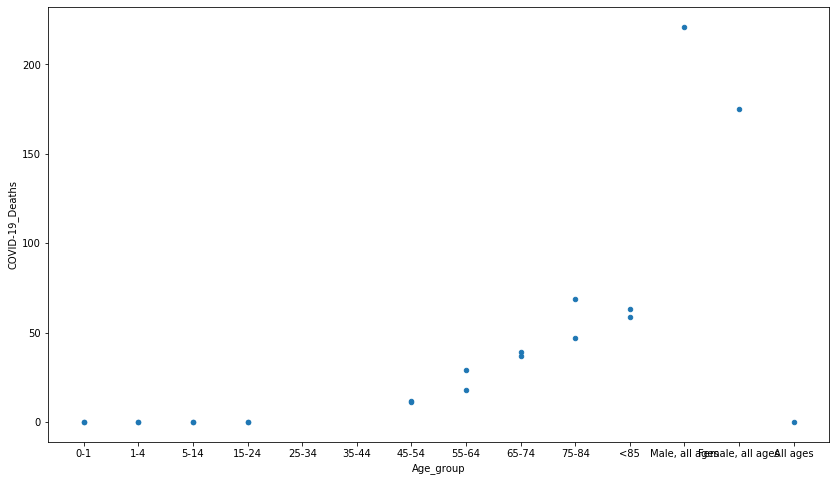

In [179]:
plt.rcParams["figure.figsize"] = [14,8]
#x_ticks_labels = ['0-1','1-4','5-14','15-24','25-34','35-44','55-64','65-74', '75-84', '<85']
Arizona.plot.scatter('Age_group','COVID-19_Deaths')
plt.show()

AttributeError: module 'pandas' has no attribute 'df'